In [11]:
from sympy import *
import numpy as np
import cpymad as Madx
from matplotlib import pyplot as plt
import sympy
import scipy as sp



In [12]:
# define the symbols

x=Symbol('x') 
y=Symbol('y') 

beta1 = Symbol('beta_1') # madx beta 1 
beta2 = Symbol('beta_2')
betas = Symbol('beta_s')
betak = Symbol('beta_k')

dmu = Symbol('\Delta \mu')
mu1 = Symbol('\mu_1')
mu2 = Symbol('\mu_2')
mus = Symbol('\mu_s')
muk = Symbol('\mu_k')

alf1 = Symbol('alpha_1')
alf2 = Symbol('alpha_2')
alfs = Symbol('alpha_s')
alfk = Symbol('alpha_k')

dx1 = Symbol('{\Delta x}_{1}')
dx_p1 = Symbol('{\Delta x\'}_{1}')

dx2 = Symbol('{\Delta x}_{2}')
dx_p2 = Symbol('{\Delta x\'}_{2}')

dxs = Symbol('{\Delta x}_{{s}}')
dx_ps = Symbol('{\Delta x\'}_{{ s}}')
dxk = Symbol('{\Delta x}_{{k}}')
dx_pk = Symbol('{\Delta x\'}_{{k}}')


X_1 = Matrix([[dx1],[dx_p1]])
X_2 = Matrix([[dx2],[dx_p2]])
X_s = Matrix([[dxs],[dx_ps]])
X_k = Matrix([[dxk],[dx_pk]])


### Exercise 4 - Extraction of the beam.

We have four correctors, $C1, C2, C3, C4$, and a kicker in addition to the lattice from Exercise 3. 

Text(0.5, 0, 's')

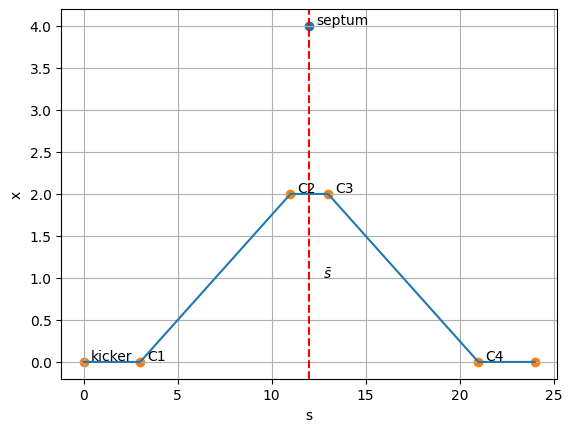

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = [ 0, 3, 11, 13, 21, 24]
y = [ 0, 0, 2, 2, 0, 0]
septum_x = 12
septum_y = 4
plt.scatter(septum_x, septum_y)
plt.plot(x,y, )
ax.annotate('kicker', xy=(0,0), xytext=(5,1), textcoords='offset points')
ax.annotate('septum', xy=(12,4), xytext=(5,1), textcoords='offset points')

ax.annotate('C1', xy=(3,0), xytext=(5,1), textcoords='offset points')
ax.annotate('C2', xy=(11,2), xytext=(5,1), textcoords='offset points')
ax.annotate('C3', xy=(13,2), xytext=(5,1), textcoords='offset points')
ax.annotate('C4', xy=(21,0), xytext=(5,1), textcoords='offset points')

ax.annotate('$\\bar{s}$', xy=(12,1), xytext=(10,0), textcoords='offset points')


plt.scatter(x,y)
plt.grid()
plt.axvline(x=12, c='r', linestyle='--')
plt.ylabel('x')
plt.xlabel('s')

### Transport Matrix calculation

We need to find the strength and position of the correctors and the kicker, to allow us to have a $x$ and $x'$ appropriate for the extraction. 



Let $M_{1|2}$ be the transfer matrix for the lattice position from the kicker K1 to K2 defined by the courant snyder parameters, $\beta$, $\alpha$, and the phase $\mu$, defined in the lectures. 







Let $M^{ij}$ be the elements of the matrix : 


$$ 
{\begin{bmatrix} M^{11} & M^{12}  \\ M^{21} &  M^{22}\end{bmatrix}}
$$
Then in the linear approximation:$$ {\Delta x_s} = {M_{(1|s)}^{12}} {\Delta x'_1} + {M_{(2|s)}^{12}} {\Delta x'_2} $$ and  $${\Delta x'_s} = {M_{(1|s)}^{22}} {\Delta x'_1} + {M_{(2|s)}^{22}} {\Delta x'_2} $$

Thus: 

$$
\bf{\Delta x_s} = \bf{M^*} \begin{bmatrix} \Delta x'_1 \\ \Delta x'_2 \end{bmatrix} 
$$

Where $$\bf{M^*} = \begin{bmatrix} M^{12}_{(1|s)} & M^{12}_{(2|s)}  \\ M^{22}_{(1|s)} &  M^{22}_{(2|s)}  \end{bmatrix}$$ 



So, the needed correction is $$\bf{M^{*-1}}\Delta x_s $$

The goal is to have $$\begin{bmatrix} x_s \\ x_s'  \end{bmatrix}  = \begin{bmatrix} 2 \\  0 \end{bmatrix} [mm]$$

With the non-linearities from the sextupoles we can compute iteratively to reach the required 2mm. 



### Defining the transport matrix with Sympy $M_{(1|s)}$ and $M_{(2|s)}$:

In [131]:
m_1s = Matrix([[sqrt(beta1/betas)*(cos(mus-mu1) + alfs*sin(mus-mu1)), sqrt(betas
               *beta1)*sin(mus-mu1)],
              [  (-alf1-alfs)/sqrt(betas*beta1)*cos(mus-mu1)-(1+alf1*alfs)/sqrt(beta1*betas)*sin(mus-mu1),   
               sqrt(beta1/betas)*(cos(mus-mu1)-alfs*sin(mus-mu1))]] ) 

m_2s = Matrix([[sqrt(beta2/betas)*(cos(mus-mu2) + alfs*sin(mus-mu2)), sqrt(betas
               *beta2)*sin(mus-mu2)],
              [  (-alf2-alfs)/sqrt(betas*beta2)*cos(mus-mu2)-(1+alf2*alfs)/sqrt(beta2*betas)*sin(mus-mu2),   
               sqrt(beta2/betas)*(cos(mus-mu2)-alfs*sin(mus-mu2))]] ) 

m_1s


Matrix([
[                                                    sqrt(beta_1/beta_s)*(-alpha_s*sin(\mu_1 - \mu_s) + cos(\mu_1 - \mu_s)),                               -sqrt(beta_1*beta_s)*sin(\mu_1 - \mu_s)],
[(-alpha_1 - alpha_s)*cos(\mu_1 - \mu_s)/sqrt(beta_1*beta_s) + (alpha_1*alpha_s + 1)*sin(\mu_1 - \mu_s)/sqrt(beta_1*beta_s), sqrt(beta_1/beta_s)*(alpha_s*sin(\mu_1 - \mu_s) + cos(\mu_1 - \mu_s))]])

### Calculating in Sympy the $\Delta x'$ from C1 to C2. We can define $\bf{M^*}$:

In [129]:
M_star = Matrix([[ betas *beta1*sin(mus-mu1) ,  betas*beta2*sin(mus-mu2)],
                     [sqrt(beta1/betas)*(cos(mus-mu1)-alfs*sin(mus-mu1))  ,  sqrt(beta2/betas)*(cos(mus-mu2)-alfs*sin(mus-mu2))]]) 

M_star


Matrix([
[                                    -beta_1*beta_s*sin(\mu_1 - \mu_s),                                     -beta_2*beta_s*sin(\mu_2 - \mu_s)],
[sqrt(beta_1/beta_s)*(alpha_s*sin(\mu_1 - \mu_s) + cos(\mu_1 - \mu_s)), sqrt(beta_2/beta_s)*(alpha_s*sin(\mu_2 - \mu_s) + cos(\mu_2 - \mu_s))]])

### And $\bf{M^{*-1}}$:

In [130]:
M_star**-1

Matrix([
[ (-alpha_s*sqrt(beta_2/beta_s)*sin(\mu_2 - \mu_s) - sqrt(beta_2/beta_s)*cos(\mu_2 - \mu_s))/(alpha_s*beta_1*beta_s*sqrt(beta_2/beta_s)*sin(\mu_1 - \mu_s)*sin(\mu_2 - \mu_s) - alpha_s*beta_2*beta_s*sqrt(beta_1/beta_s)*sin(\mu_1 - \mu_s)*sin(\mu_2 - \mu_s) + beta_1*beta_s*sqrt(beta_2/beta_s)*sin(\mu_1 - \mu_s)*cos(\mu_2 - \mu_s) - beta_2*beta_s*sqrt(beta_1/beta_s)*sin(\mu_2 - \mu_s)*cos(\mu_1 - \mu_s)),  -beta_2*sin(\mu_2 - \mu_s)/(alpha_s*beta_1*sqrt(beta_2/beta_s)*sin(\mu_1 - \mu_s)*sin(\mu_2 - \mu_s) - alpha_s*beta_2*sqrt(beta_1/beta_s)*sin(\mu_1 - \mu_s)*sin(\mu_2 - \mu_s) + beta_1*sqrt(beta_2/beta_s)*sin(\mu_1 - \mu_s)*cos(\mu_2 - \mu_s) - beta_2*sqrt(beta_1/beta_s)*sin(\mu_2 - \mu_s)*cos(\mu_1 - \mu_s))],
[(-alpha_s*sqrt(beta_1/beta_s)*sin(\mu_1 - \mu_s) - sqrt(beta_1/beta_s)*cos(\mu_1 - \mu_s))/(-alpha_s*beta_1*beta_s*sqrt(beta_2/beta_s)*sin(\mu_1 - \mu_s)*sin(\mu_2 - \mu_s) + alpha_s*beta_2*beta_s*sqrt(beta_1/beta_s)*sin(\mu_1 - \mu_s)*sin(\mu_2 - \mu_s) - beta_1*beta_s

### For the kicker

The required phase advance, to have an $x' = 0$ at the septum, is $\pi/2 + n*2\pi$ between the kicker and $s$.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def plot_ellipse(beta, alpha, epsilon, ax, x0=0, px0=0, facecolor='black', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    
    gamma = (1+alpha**2)/beta
    cov = epsilon*np.array([[beta, -alpha], [-alpha, gamma]])
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0])
    mean_x = x0

    scale_y = np.sqrt(cov[1, 1])
    mean_y = px0

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [123]:

alpha=1
beta =15
j = 6.

xlim = np.sqrt(2*beta*j)
xarray=np.linspace(-xlim,xlim,40)


def fun(x):  
    gamma = (1+alpha**2)/beta
    value = gamma*xvalue**2 + 2*alpha*xvalue*x + beta*x**2 
    return value - 2*j

xprime_neg=[]
#scipy.optimize.root(fun, args=[0,0,0,0],  x0=0.)
for i in range(40):
    xvalue = xarray[i]
    sol = sp.optimize.fsolve(fun, x0=[-3],  )
    xprime_neg.append(sol )


xprime_pos=[]
#scipy.opimize.root(fun, args=[0,0,0,0],  x0=0.)
for i in range(40):
    xvalue = xarray[i]
    sol = sp.optimize.fsolve(fun, x0=[3],  )
    xprime_pos.append(sol)

Text(0, 0.5, "x'")

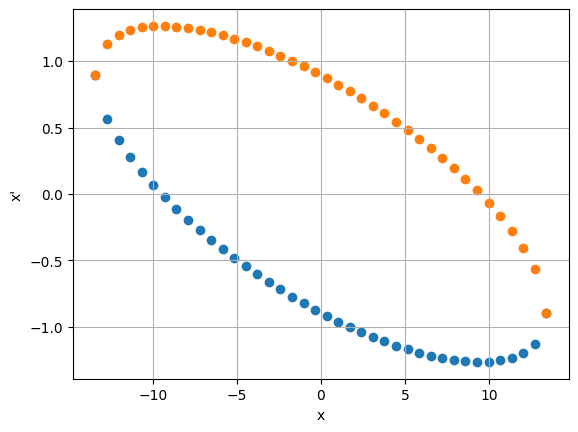

In [126]:
xprime_pos = np.array(xprime_pos).flatten()
xprime_neg = np.array(xprime_neg).flatten()

xarray = np.array(xarray).flatten()
plt.scatter(xarray, xprime_neg)
plt.scatter(xarray, xprime_pos)

plt.grid()
plt.xlabel('x')
plt.ylabel('x\'')

In [110]:
sol

array([0.])

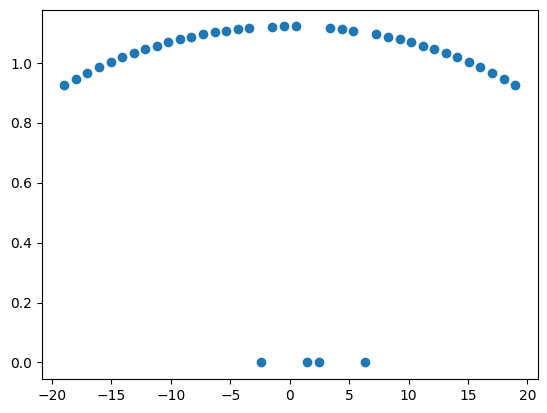